# Load Data

In [72]:
#loading sample data
import pandas as pd
url = 'https://raw.githubusercontent.com/seedboxtech/datasciencetest/master/testSamples.csv'
samples_df = pd.read_csv(url, index_col = None)

In [4]:
samples_df.head(5)

,sample_id,test_group
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1


In [73]:
#loading transaction data
url = 'https://raw.githubusercontent.com/seedboxtech/datasciencetest/master/transData.csv'
transactions_df = pd.read_csv(url,index_col=None)

In [6]:
transactions_df.head(5)

,transaction_id,sample_id,transaction_type,transaction_amount
0,52346326,11,REBILL,24.95
1,52346327,11,REBILL,24.95
2,52346328,32,REBILL,29.95
3,52346329,32,REBILL,29.95
4,52346330,32,REBILL,29.95


#Data Cleaning and Preprocessing

In [69]:
transactions_df.columns

Index(['transaction_id', 'sample_id', 'transaction_type',
       'transaction_amount'],
      dtype='object')

In [70]:
samples_df.shape

(59721, 2)

In [71]:
transactions_df.shape

(7430, 4)

In [72]:
transactions_df["sample_id"].nunique()


2714

In [74]:
#checking for nan values
transactions_df.isna().sum()

transaction_id        0
sample_id             0
transaction_type      0
transaction_amount    0
dtype: int64

In [75]:
#checking for nan values
samples_df.isna().sum()

sample_id     0
test_group    0
dtype: int64

In [79]:

samples_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
59716    False
59717    False
59718    False
59719    False
59720    False
Length: 59721, dtype: bool

In [80]:
#checking for duplicate rows
samples_df[samples_df.duplicated()]

,sample_id,test_group


In [81]:
#checking for duplicate rows
transactions_df[transactions_df.duplicated()]

,transaction_id,sample_id,transaction_type,transaction_amount


#Exploratory Data Analysis

In [84]:
#looking at data types
samples_df.dtypes

sample_id     int64
test_group    int64
dtype: object

In [85]:
#looking at data types
transactions_df.dtypes

transaction_id          int64
sample_id               int64
transaction_type       object
transaction_amount    float64
dtype: object

In [90]:
samples_df['test_group'].value_counts()

0    44886
1    14835
Name: test_group, dtype: int64

In [91]:
transactions_df['transaction_type'].value_counts()

REBILL        6961
REFUND         306
CHARGEBACK     163
Name: transaction_type, dtype: int64

In [92]:
transactions_df['transaction_amount'].unique()

array([ 24.95,  29.95,  19.95,  32.95,  39.95, -29.95, -24.95, -32.95,
       -19.95, -39.95])

In [74]:
#assigning seperate dataframe to prevent changes in original table
eda_transactions_df = transactions_df

In [75]:
#adding sample ids to transaction data
for idx, x in enumerate(eda_transactions_df['sample_id']):
  for idy, y in enumerate(samples_df['sample_id']):
    if x == y:
      eda_transactions_df.loc[idx, 'test_group' ] = samples_df.loc[idy,'test_group']
      break

In [76]:
eda_transactions_df.head()

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11,REBILL,24.95,1.0
1,52346327,11,REBILL,24.95,1.0
2,52346328,32,REBILL,29.95,1.0
3,52346329,32,REBILL,29.95,1.0
4,52346330,32,REBILL,29.95,1.0


In [77]:
eda_transactions_df['test_group'].value_counts()

0.0    4050
1.0    3380
Name: test_group, dtype: int64

In [78]:
eda_transactions_df_test = eda_transactions_df[eda_transactions_df['test_group'] == 1]

In [79]:
eda_transactions_df_control = eda_transactions_df[eda_transactions_df['test_group'] == 0]

In [80]:
eda_transactions_df_testbysample = eda_transactions_df_test.groupby('sample_id').count()

In [81]:
#getting average number of transactions of any kind per sample id for test group
eda_transactions_df_testbysample['test_group'].mean()

2.067278287461774

In [82]:
eda_transactions_df_controlbysample = eda_transactions_df_control.groupby('sample_id').count()

In [83]:
#getting average number of transactions of any kind per sample id for control group
eda_transactions_df_controlbysample['test_group'].mean()

3.753475440222428

In [86]:
#looking at counts of each transaction type
eda_transactions_df['transaction_type'].value_counts()

REBILL        6961
REFUND         306
CHARGEBACK     163
Name: transaction_type, dtype: int64

In [87]:
#looking at counts of transaction types for control group
eda_transactions_df_control = eda_transactions_df[eda_transactions_df['test_group'] == 0]
eda_transactions_df_control['transaction_type'].value_counts()

REBILL        3756
REFUND         188
CHARGEBACK     106
Name: transaction_type, dtype: int64

In [88]:
#looking at count of transaction types for test group
eda_transactions_df_test = eda_transactions_df[eda_transactions_df['test_group'] == 1]
eda_transactions_df_test['transaction_type'].value_counts()

REBILL        3205
REFUND         118
CHARGEBACK      57
Name: transaction_type, dtype: int64

In [89]:
#looking at counts of transaction amounts for control group rebills
eda_transactions_df_control_rebill = eda_transactions_df_control[eda_transactions_df_control['transaction_type']== 'REBILL']
eda_transactions_df_control_rebill['transaction_amount'].value_counts()

24.95    1368
32.95    1199
19.95    1189
Name: transaction_amount, dtype: int64

In [92]:
#looking at counts of transaction amounts for control group chargebacks
eda_transactions_df_control_charge = eda_transactions_df_control[eda_transactions_df_control['transaction_type']== 'CHARGEBACK']
eda_transactions_df_control_charge['transaction_amount'].value_counts()

-24.95    40
-19.95    38
-32.95    28
Name: transaction_amount, dtype: int64

In [93]:
#looking at counts of transaction amounts for control group refunds
eda_transactions_df_control_refund = eda_transactions_df_control[eda_transactions_df_control['transaction_type']== 'REFUND']
eda_transactions_df_control_refund['transaction_amount'].value_counts()

-19.95    69
-32.95    62
-24.95    57
Name: transaction_amount, dtype: int64

In [94]:
#looking at counts of transaction amounts for test group rebills
eda_transactions_df_test_rebill = eda_transactions_df_test[eda_transactions_df_test['transaction_type']== 'REBILL']
eda_transactions_df_test_rebill['transaction_amount'].value_counts()

24.95    1124
39.95    1050
29.95    1031
Name: transaction_amount, dtype: int64

In [96]:
#looking at counts of transaction amounts for test group chargebacks
eda_transactions_df_test_charge = eda_transactions_df_test[eda_transactions_df_test['transaction_type']== 'CHARGEBACK']
eda_transactions_df_test_charge['transaction_amount'].value_counts()

-39.95    27
-29.95    15
-24.95    15
Name: transaction_amount, dtype: int64

In [97]:
#looking at counts of transaction amounts for test group refunds
eda_transactions_df_test_refund = eda_transactions_df_test[eda_transactions_df_test['transaction_type']== 'REFUND']
eda_transactions_df_test_refund['transaction_amount'].value_counts()

-29.95    49
-24.95    46
-39.95    23
Name: transaction_amount, dtype: int64

In [110]:
#grouping number of transactions for test by sample id and looking at highest multiple transaction users
eda_transactions_df_group_test = eda_transactions_df_test[['sample_id','test_group']].groupby('sample_id',as_index = False).count()
eda_transactions_df_group_test_bins = eda_transactions_df_group_test.groupby('test_group',as_index = False).count()

In [111]:
eda_transactions_df_group_test_bins

,test_group,sample_id
0,1,772
1,2,437
2,3,203
3,4,106
4,5,63
5,6,21
6,7,17
7,8,9
8,9,3
9,10,3


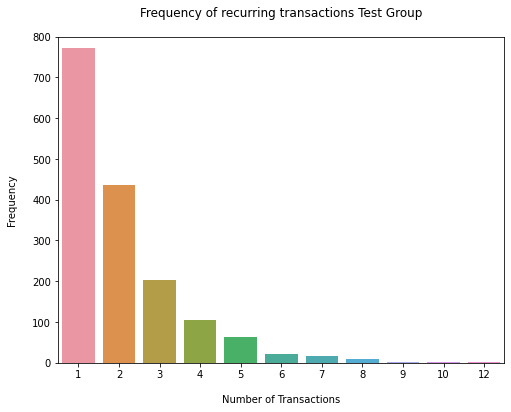

In [121]:
#plotting histogram of test group recurring transactions
plt.figure(figsize=(8,6))

sns.barplot(x=eda_transactions_df_group_test_bins['test_group'], y=eda_transactions_df_group_test_bins['sample_id'], ci=False)

plt.ylim(0, 800)
plt.title('Frequency of recurring transactions Test Group', pad=20)
plt.xlabel('Number of Transactions', labelpad=15)
plt.ylabel('Frequency', labelpad=15);

In [115]:
#grouping number of transactions for control by sample id and looking at highest multiple transaction users
eda_transactions_df_group_control = eda_transactions_df_control[['sample_id','test_group']].groupby('sample_id',as_index = False).count()
eda_transactions_df_group_control_bins = eda_transactions_df_group_control.groupby('test_group',as_index = False).count()

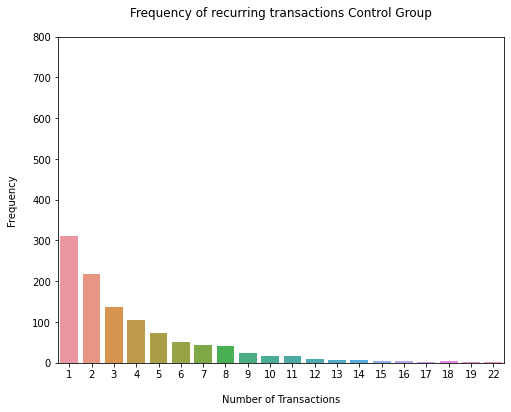

In [122]:
#plotting histogram of control group recurring transactions
plt.figure(figsize=(8,6))

sns.barplot(x=eda_transactions_df_group_control_bins['test_group'], y=eda_transactions_df_group_control_bins['sample_id'], ci=False)

plt.ylim(0, 800)
plt.title('Frequency of recurring transactions Control Group', pad=20)
plt.xlabel('Number of Transactions', labelpad=15)
plt.ylabel('Frequency', labelpad=15);

In [84]:
#looking for duplicate transaction numbers
transactions_df['transaction_id'].duplicated().sum()

0

In [85]:
#looking for duplicate sample numbers
samples_df['sample_id'].duplicated().sum()

0

#Feature Engineering


must do feature engineering for rebill, chargeback and refund columns



In [123]:
#creating new columns for each transaction type and assigning a value of 1 for the transaction type it corresponds with
getdummies = pd.get_dummies(transactions_df['transaction_type'])

In [124]:
#adding the new columns to the data set
transactions_df = transactions_df.join(getdummies)
transactions_df.head()

,transaction_id,sample_id,transaction_type,transaction_amount,test_group,CHARGEBACK,REBILL,REFUND
0,52346326,11,REBILL,24.95,1.0,0,1,0
1,52346327,11,REBILL,24.95,1.0,0,1,0
2,52346328,32,REBILL,29.95,1.0,0,1,0
3,52346329,32,REBILL,29.95,1.0,0,1,0
4,52346330,32,REBILL,29.95,1.0,0,1,0


In [125]:
# deleting original transaction type column
del transactions_df['transaction_type']

In [126]:
# creating new columns for samples dataframe and defaulting values to zero
samples_df[['transaction_amount', 'CHARGEBACK','REBILL','REFUND']] = 0

In [127]:
samples_df.head()

,sample_id,test_group,transaction_amount,CHARGEBACK,REBILL,REFUND
0,1,0,0,0,0,0
1,2,1,0,0,0,0
2,3,0,0,0,0,0
3,4,1,0,0,0,0
4,5,1,0,0,0,0


#Data Visualizations and Aggregations

##Plotting Probability Distribution from control group to test group

###What is the aproximate probability distribution between the test group and the control group

In [128]:
samples_df['test_group'].value_counts()

0    44886
1    14835
Name: test_group, dtype: int64

In [129]:
#sepereating dataframe between control and test
test_samples_df = samples_df.loc[samples_df['test_group'] == 1]
control_samples_df = samples_df.loc[samples_df['test_group'] == 0]

In [130]:
#calculating test rate out of samples
test_sample_rate = test_samples_df['test_group'].count()/samples_df['test_group'].count()

In [131]:
test_sample_rate

0.24840508363892097

In [132]:
#getting total test sample number
test_sample_x = test_samples_df['test_group'].count()
test_sample_x

14835

In [133]:
#assigning total sample value
sample_n = samples_df['test_group'].count()
sample_n

59721

In [134]:
#calculating control rate from samples
control_sample_rate = control_samples_df['test_group'].count()/samples_df['test_group'].count()

In [135]:
control_sample_rate

0.751594916361079

In [136]:
#getting total control group number
control_sample_x = control_samples_df['test_group'].count()
control_sample_x

44886

In [137]:
from scipy.stats import binom

In [138]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial')]

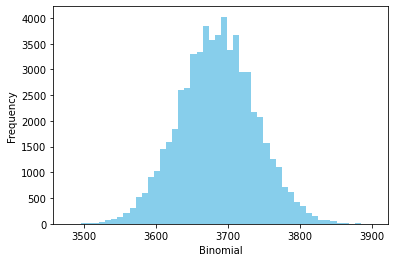

In [139]:
data_binom = binom.rvs(n=test_sample_x,p=test_sample_rate,size=sample_n)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')


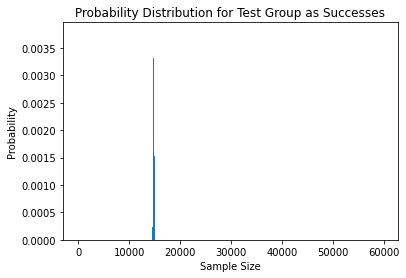

In [141]:
#plotting a Binomial Distribution between control and test group
from scipy.stats import binom
import matplotlib.pyplot as plt
# setting the values
# of n and p
n = sample_n
p = test_sample_rate
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.xlabel('Sample Size')
plt.ylabel('Probability')
plt.title('Probability Distribution for Test Group as Successes')
plt.bar(r_values, dist)
plt.show()

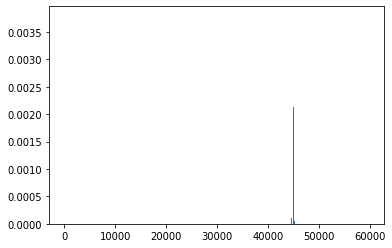

In [25]:

# setting the values
# of n and p
n = sample_n
pc = control_sample_rate
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, pc) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show()

##Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL?

In [142]:
# grouping transaction by sample_id and taking mean value 
transactions_per_sample_df_mean = transactions_df[['sample_id','transaction_amount','CHARGEBACK','REBILL','REFUND']].groupby(by='sample_id',as_index = False).mean()

In [143]:
samples_df_mean = samples_df

In [144]:
#nested loops to go through each sample id and match it with sample ids from transaction and copy over information
for idx, x in enumerate(transactions_per_sample_df_mean['sample_id']):
  for idy, y in enumerate(samples_df_mean['sample_id']):
    if x == y:
      samples_df_mean.loc[idy, 'transaction_amount' ] = transactions_per_sample_df_mean.loc[idx,'transaction_amount']
      samples_df_mean.loc[idy, 'CHARGEBACK' ] = transactions_per_sample_df_mean.loc[idx,'CHARGEBACK']
      samples_df_mean.loc[idy, 'REBILL' ] = transactions_per_sample_df_mean.loc[idx,'REBILL']
      samples_df_mean.loc[idy, 'REFUND' ] = transactions_per_sample_df_mean.loc[idx,'REFUND']
      break

In [145]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
from math import ceil

In [146]:
#calculating rebill rate, std deviation and std error
rebill_rates = samples_df_mean.groupby('test_group')['REBILL']
std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

rebill_rates = rebill_rates.agg([np.mean, std_p, se_p])
rebill_rates.columns = ['rebill_rate', 'std_deviation', 'std_error']


rebill_rates.style.format('{:.3f}')

,rebill_rate,std_deviation,std_error
test_group,,,
0,0.021,0.143,0.001
1,0.105,0.306,0.003


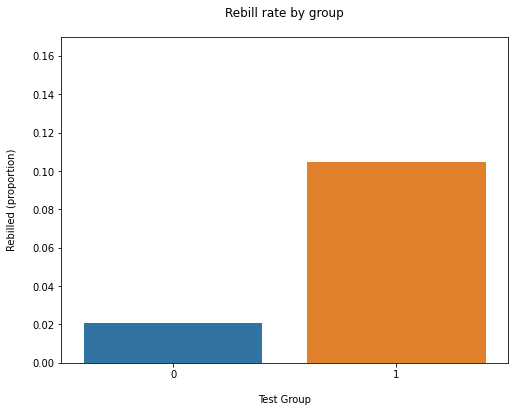

In [147]:
#barplot for rebill rate
plt.figure(figsize=(8,6))

sns.barplot(x=samples_df_mean['test_group'], y=samples_df_mean['REBILL'], ci=False)

plt.ylim(0, 0.17)
plt.title('Rebill rate by group', pad=20)
plt.xlabel('Test Group', labelpad=15)
plt.ylabel('Rebilled (proportion)', labelpad=15);

In [148]:
#z-test for significance on rebill rate
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = samples_df_mean[samples_df_mean['test_group'] == 0]['REBILL']
test_results = samples_df_mean[samples_df_mean['test_group'] == 1]['REBILL']
n_con = control_results.count()
n_test = test_results.count()
successes = [control_results.sum(), test_results.sum()]
nobs = [n_con, n_test]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for test group: [{lower_test:.3f}, {upper_test:.3f}]')

z statistic: -44.20
p-value: 0.000
ci 95% for control group: [0.020, 0.022]
ci 95% for test group: [0.100, 0.110]


##Is a user that must call-in to cancel more likely to generate more revenues?

In [149]:
# grouping transaction data by sample ids and taking sum of values
transactions_per_sample_df_sum = transactions_df[['sample_id','transaction_amount']].groupby(by='sample_id',as_index = False).sum()

In [150]:
samples_df_sum = samples_df

In [151]:
#nested loops to match sample ids from transaction data to sample data and copying over sum
for idx, x in enumerate(transactions_per_sample_df_sum['sample_id']):
  for idy, y in enumerate(samples_df_sum['sample_id']):
    if x == y:
      samples_df_sum.loc[idy, 'transaction_amount' ] = transactions_per_sample_df_sum.loc[idx,'transaction_amount']
      break

In [152]:
samples_df_sum['transaction_amount'].sum()

185272.40000000002

In [153]:
#calculating revenue rate per user in test vs control and std deviation and std error
revenue_rates = samples_df_sum.groupby('test_group')['transaction_amount']
std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

revenue_rates = revenue_rates.agg([np.mean, std_p, se_p])
revenue_rates.columns = ['revenue_rate', 'std_deviation', 'std_error']


revenue_rates.style.format('{:.3f}')

,revenue_rate,std_deviation,std_error
test_group,,,
0,2.001,20.447,0.097
1,6.433,25.704,0.211


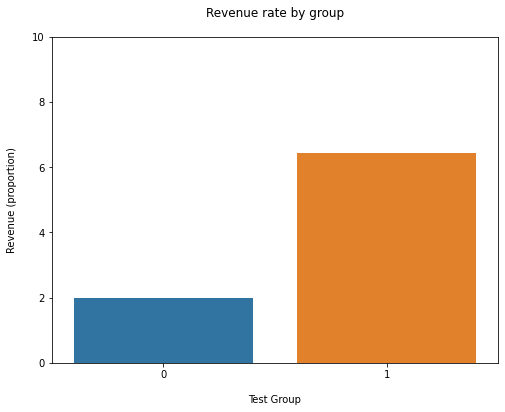

In [154]:
#plotting revenue rate of test and control group
plt.figure(figsize=(8,6))

sns.barplot(x=samples_df_sum['test_group'], y=samples_df_sum['transaction_amount'], ci=False)

plt.ylim(0, 10)
plt.title('Revenue rate by group', pad=20)
plt.xlabel('Test Group', labelpad=15)
plt.ylabel('Revenue (proportion)', labelpad=15);

In [155]:
#performing Mann-Whitney-Wilcoxon rank-sum test
stats.mannwhitneyu(x=samples_df_sum['test_group'], y=samples_df_sum['transaction_amount'])

MannwhitneyuResult(statistic=1428270492.0, pvalue=0.0)

## Is a user that must call-in more likely to produce a higher chargeback rate(CHARGEBACKs/REBILLs)?

In [156]:
test_samples_df_mean = samples_df_mean.loc[samples_df_mean['test_group'] == 1]

In [157]:
#calculating test chargeback rate
test_chargeback_sum = test_samples_df_mean['CHARGEBACK'].sum()
test_rebill_sum = test_samples_df_mean['REBILL'].sum()
test_chargeback_rate = test_chargeback_sum/test_rebill_sum
test_chargeback_rate

0.016683230270906946

In [158]:
control_samples_df_mean = samples_df_mean.loc[samples_df_mean['test_group'] == 0]

In [159]:
#calculating contorl chargeback rate
control_chargeback_sum = control_samples_df_mean['CHARGEBACK'].sum()
control_rebill_sum = control_samples_df_mean['REBILL'].sum()
control_chargeback_rate = control_chargeback_sum/control_rebill_sum
control_chargeback_rate

0.05504505835426208

In [160]:
#dividing test rate my sample size
control_chargeback_rate_peruser = control_chargeback_rate/control_sample_x
control_chargeback_rate_peruser

1.2263302222132085e-06

In [161]:
#dividing control rate by sample size
test_chargeback_rate_peruser = test_chargeback_rate/test_sample_x
test_chargeback_rate_peruser

1.1245857951403403e-06

In [162]:
#creating dataframe
d = {'test_group': [0, 1], 'chargeback_rate': [1.2263302222132085e-06, 1.1245857951403403e-06]}
chargeback_rate_df = pd.DataFrame(data=d)

In [163]:
chargeback_rate_df

,test_group,chargeback_rate
0,0,0.000001
1,1,0.000001


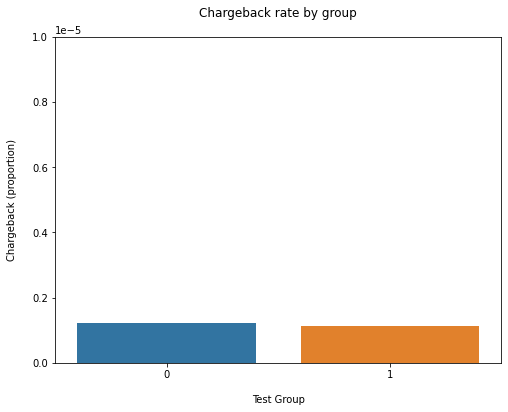

In [164]:
#plotting chargeback rate of test and control group
plt.figure(figsize=(8,6))

sns.barplot(x=chargeback_rate_df['test_group'], y=chargeback_rate_df['chargeback_rate'], ci=False)

plt.ylim(0, 0.00001)
plt.title('Chargeback rate by group', pad=20)
plt.xlabel('Test Group', labelpad=15)
plt.ylabel('Chargeback (proportion)', labelpad=15);

In [165]:
#performing z-test on chargeback rates
control_results = chargeback_rate_df[chargeback_rate_df['test_group'] == 0]['chargeback_rate']
test_results = chargeback_rate_df[chargeback_rate_df['test_group'] == 1]['chargeback_rate']
n_con = control_results.count()
n_test = test_results.count()
successes = [control_results.sum(), test_results.sum()]
nobs = [n_con, n_test]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for test group: [{lower_test:.3f}, {upper_test:.3f}]')

z statistic: 0.00
p-value: 1.000
ci 95% for control group: [0.000, 0.002]
ci 95% for test group: [0.000, 0.002]
